### Let us start our exercise by importing the relevant libraries

In [63]:
%matplotlib inline
import itertools
import numpy as np
import pandas as pd
from scipy import special
import sobol_seq
import matplotlib.pyplot as plt
from pandas import ExcelWriter
import matplotlib.colors as colors
colors_list = list(colors._colors_full_map.values())

### Define the test functions

In [64]:
k = 8

o = 15

m = 20

a = np.array([0,0.5,1,1.5,2,2.5,3,3.5])
b = np.array([6.42,6.42,6.42,6.42,6.42,6.42])

a1 = np.array([0.0118, 0.0456, 0.2297, 0.0393, 0.1177, 0.3865, 0.3897, 0.6061, 0.6159, 0.4005, 1.0741, 1.1474, 0.7880, 1.1242, 1.1982])
a2 = np.array([0.4341, 0.0887, 0.0512, 0.3233, 0.1489, 1.0360, 0.9892, 0.9672, 0.8977, 0.8083, 1.8426, 2.4712, 2.3946, 2.0045, 2.2621])
a3 = np.array([0.1044, 0.2057, 0.0774, 0.2730, 0.1253, 0.7526, 0.8570, 1.0331, 0.8388, 0.7970, 2.2145, 2.0382, 2.4004, 2.0541, 1.9845])

M = np.array([[-0.022482886, -0.18501666, 0.13418263, 0.36867264, 0.17172785, 0.13651143, -0.44034404, -0.081422854, 0.71321025, -0.44361072,
0.50383394, -0.024101458, -0.045939684, 0.21666181, 0.055887417],
[0.25659630, 0.053792287, 0.25800381, 0.23795905, -0.59125756, -0.081627077, -0.28749073, 0.41581639, 0.49752241, 0.083893165, -0.11056683, 
0.033222351, -0.13979497, -0.031020556, -0.22318721],
[-0.055999811, 0.19542252, 0.095529005, -0.28626530, -0.14441303, 0.22369356, 0.14527412, 0.28998481, 0.23105010, -0.31929879, -0.29039128, 
-0.20956898, 0.43139047, 0.024429152, 0.044904409],
[0.66448103, 0.43069872, 0.29924645, -0.16202441, -0.31479544, -0.39026802, 0.17679822, 0.057952663, 0.17230342, 0.13466011, -0.35275240, 
0.25146896, -0.018810529, 0.36482392, -0.32504618],
[-0.12127800, 0.12463327, 0.10656519, 0.046562296, -0.21678617, 0.19492172, -0.065521126, 0.024404669, -0.096828860, 0.19366196, 0.33354757, 
0.31295994, -0.083615456, -0.25342082, 0.37325717],
[-0.28376230, -0.32820154, -0.10496068, -0.22073452, -0.13708154, -0.14426375, -0.11503319, 0.22424151, -0.030395022, -0.51505615, 
0.017254978, 0.038957118, 0.36069184, 0.30902452, 0.050030193],
[-0.077875893, 0.0037456560, 0.88685604, -0.26590028, -0.079325357, -0.042734919, -0.18653782, -0.35604718, -0.17497421, 0.088699956, 
0.40025886, -0.055979693, 0.13724479, 0.21485613, -0.011265799],
[-0.092294730, 0.59209563, 0.031338285, -0.033080861, -0.24308858, -0.099798547, 0.034460195, 0.095119813, -0.33801620, 0.0063860024, 
-0.61207299, 0.081325416, 0.88683114, 0.14254905, 0.14776204],
[-0.13189434, 0.52878496, 0.12652391, 0.045113625, 0.58373514, 0.37291503, 0.11395325, -0.29479222, -0.57014085, 0.46291592, -0.094050179, 
0.13959097, -0.38607402, -0.44897060, -0.14602419],
[0.058107658, -0.32289338, 0.093139162, 0.072427234, -0.56919401, 0.52554237, 0.23656926, -0.011782016, 0.071820601, 0.078277291, 
-0.13355752, 0.22722721, 0.14369455, -0.45198935, -0.55574794],
[0.66145875, 0.34633299, 0.14098019, 0.51882591, -0.28019898, -0.16032260, -0.068413337, -0.20428242, 0.069672173, 0.23112577, -0.044368579,
-0.16455425, 0.21620977, 0.0042702105, -0.087399014],
[0.31599556, -0.027551859, 0.13434254, 0.13497371, 0.054005680, -0.17374789, 0.17525393, 0.060258929, -0.17914162, -0.31056619, -0.25358691,
0.025847535, -0.43006001, -0.62266361, -0.033996882],
[-0.29038151, 0.034101270, 0.034903413, -0.12121764, 0.026030714, -0.33546274, -0.41424111, 0.053248380, -0.27099455, -0.026251302, 
0.41024137, 0.26636349, 0.15582891, -0.18666254, 0.019895831],
[-0.24388652, -0.44098852, 0.012618825, 0.24945112, 0.071101888, 0.24623792, 0.17484502, 0.0085286769, 0.25147070, -0.14659862, -0.084625150,
0.36931333, -0.29955293, 0.11044360, -0.75690139],
[0.041494323, -0.25980564, 0.46402128, -0.36112127, -0.94980789, -0.16504063, 0.0030943325, 0.052792942, 0.22523648, 0.38390366, 0.45562427,
-0.18631744, 0.0082333995, 0.16670803, 0.16045688]])

def A1(sm):
    return pd.Series([np.prod(sm.iloc[:,:j+1],axis=1)*(-1)**(j+1) for j in range(k)]).sum()

def A2(sm):
    return pd.Series([(np.abs(4*sm[j]-2)+a[j])/(1+a[j]) for j in range(k)]).product()

def B1(sm):
    return pd.Series([(k-sm[j])/(k-0.5) for j in range(k)]).product()
        
def C1(sm):
    return pd.Series([np.abs(4*sm[j]-2) for j in range(k)]).product()
        
def C2(sm):
    return sm.product(axis=1)*2**k

def OO(sm):
    return np.multiply(a1,sm.iloc[:,:15]).sum(axis=1) + np.multiply(a2,np.sin(sm.iloc[:,:15])).sum(axis=1) + \
            np.multiply(a3,np.cos(sm.iloc[:,:15])).sum(axis=1) + (sm.iloc[:,:15].dot(M)*sm.iloc[:,:15]).sum(axis=1)

functions = [A1,A2,OO,B1,C1,C2]

def scrambler(q,s):
    return q+s

### Let us produce the sample matrix

In [65]:
p = 16
run = 50

n = 2

df = pd.DataFrame(sobol_seq.i4_sobol_generate(2*m, 2**p))

df_n = np.sqrt(2)*special.erfinv(2*df-1)

list_df = [df, df,df_n, df, df, df]

In [66]:
epsilon_s = [0.05,0.1]
epsilon_b = [0.01,0.015,0.02]
epsilon_list=list(itertools.product(list1, list2))

### It is finally time to assess the ranks and have the algorithm kick in to save runs

In [67]:
e_saving = []
e_list = []
for e in epsilon_list:
    kn = [k,k,o,k,k,k]

    rank_T = {f.__name__:[] for f in functions}    
    rank_T_df = {f.__name__:[] for f in functions}    
    T = {f.__name__:[] for f in functions}    
    T_df = {f.__name__:[] for f in functions}    

    CrT_dic = {f.__name__:[] for f in functions}
    T_dic = {f.__name__:[] for f in functions}

    for ifi,f in enumerate(functions):
        for pi in range(2,p+1):
            run_sample = pd.concat([list_df[ifi].iloc[:-1+2**pi] for r in range(1)])
            elementary_effect = []
            for j in range(kn[ifi]):
                rs = run_sample.copy()
                rs[j] = rs[scrambler(j,kn[ifi])]
                ea = pd.DataFrame(f(run_sample.iloc[:,:kn[ifi]]))
                ee = pd.DataFrame(0.5*(f(run_sample.iloc[:,:kn[ifi]])-f(rs.iloc[:,:kn[ifi]]))**2,columns=[j])
                ee['r']= [r for r in range(1) for rdf in range(-1+2**pi)]
                ea['r']=ee['r']
                elementary_effect.append(ee.groupby('r').mean())

            elementary_effect_df = pd.concat(elementary_effect,axis=1)

            Var_df = ea.groupby('r').var(ddof=0).values

            T_dic[f.__name__] = elementary_effect_df/Var_df

            CrT_dic[f.__name__] = elementary_effect_df.rank(axis=1,ascending=False)

            T_dic[f.__name__]['s']=2**pi
            CrT_dic[f.__name__]['s']=T_dic[f.__name__]['s']

            T[f.__name__].append(T_dic[f.__name__])
            rank_T[f.__name__].append(CrT_dic[f.__name__])    

            rank_T_df[f.__name__]=pd.concat(rank_T[f.__name__])
            T_df[f.__name__]=pd.concat(T[f.__name__])
            rank_T_df[f.__name__].index=rank_T_df[f.__name__]['s']
            T_df[f.__name__].index=T_df[f.__name__]['s']

            if rank_T_df[f.__name__].iloc[-1,-1]>4:
                if (rank_T_df[f.__name__].iloc[-1,:-1] != rank_T_df[f.__name__].iloc[-2,:-1]).any():
                    if ((T_df[f.__name__].iloc[-1,:-1][rank_T_df[f.__name__].iloc[-1,:-1]!=\
                                                   rank_T_df[f.__name__].iloc[-2,:-1]].sort_values(ascending=False)-\
                    T_df[f.__name__].iloc[-1,:-1][rank_T_df[f.__name__].iloc[-1,:-1]!=\
                                                  rank_T_df[f.__name__].iloc[-2,:-1]].reindex(T_df[f.__name__].iloc[-2,
        :-1][rank_T_df[f.__name__].iloc[-1,:-1]!=rank_T_df[f.__name__].iloc[-2,:-1]].sort_values(ascending=False).index).values).abs()/\
                    (T_df[f.__name__].iloc[-1,:-1][rank_T_df[f.__name__].iloc[-1,:-1]!=\
                                                   rank_T_df[f.__name__].iloc[-2,:-1]].sort_values(ascending=False)+\
                    T_df[f.__name__].iloc[-1,:-1][rank_T_df[f.__name__].iloc[-1,:-1]!=\
                                                  rank_T_df[f.__name__].iloc[-2,:-1]].reindex(T_df[f.__name__].iloc[-2,\
    :-1][rank_T_df[f.__name__].iloc[-1,:-1]!=rank_T_df[f.__name__].iloc[-2,:-1]].sort_values(ascending=False).index).values) > \
                    0.1).any() or ((T_df[f.__name__].iloc[-2,:-1][rank_T_df[f.__name__].iloc[-1,:-1]!=\
                                                   rank_T_df[f.__name__].iloc[-2,:-1]].sort_values(ascending=False)-\
                    T_df[f.__name__].iloc[-2,:-1][rank_T_df[f.__name__].iloc[-1,:-1]!=\
                                                  rank_T_df[f.__name__].iloc[-2,:-1]].reindex(T_df[f.__name__].iloc[-2,
        :-1][rank_T_df[f.__name__].iloc[-1,:-1]!=rank_T_df[f.__name__].iloc[-2,:-1]].sort_values(ascending=False).index).values).abs()/\
                    (T_df[f.__name__].iloc[-2,:-1][rank_T_df[f.__name__].iloc[-1,:-1]!=\
                                                   rank_T_df[f.__name__].iloc[-2,:-1]].sort_values(ascending=False)+\
                    T_df[f.__name__].iloc[-2,:-1][rank_T_df[f.__name__].iloc[-1,:-1]!=\
                                                  rank_T_df[f.__name__].iloc[-2,:-1]].reindex(T_df[f.__name__].iloc[-2,\
    :-1][rank_T_df[f.__name__].iloc[-1,:-1]!=rank_T_df[f.__name__].iloc[-2,:-1]].sort_values(ascending=False).index).values) > 0.1).any():
                        continue

                    else:
                        rs = run_sample.copy()
                        rs[T_df[f.__name__].iloc[-1][T_df[f.__name__].iloc[-1]<e[0]].index]=\
                        rs[scrambler(T_df[f.__name__].iloc[-1][T_df[f.__name__].iloc[-1]<e[0]].index,kn[ifi])]

                        elementaryeffect_rs = 0.5*(f(run_sample)-f(rs))**2
                        T_rs=((elementaryeffect_rs.expanding().mean()).iloc[T_df[f.__name__].index-2]/\
                        (pd.DataFrame(f(run_sample.iloc[:,:kn[ifi]])).expanding().var(ddof=0)).iloc[T_df[f.__name__].index-2].T).T
                        T_rs.index+=2
                        T_df[f.__name__]['rs']=T_rs

                        break

                        if (T_df[f.__name__].iloc[-1,rank_T_df[f.__name__].iloc[-1,:-1][rank_T_df[f.__name__].iloc[-1,
                        :-1]!=rank_T_df[f.__name__].iloc[-2,:-1]].index]) > e[1] or \
                        (T_df[f.__name__].iloc[-1,rank_T_df[f.__name__].iloc[-1,:-1][rank_T_df[f.__name__].iloc[-1,
                        :-1]!=rank_T_df[f.__name__].iloc[-2,:-1]].index]) > e[1]:
                            continue

                        else:
                            rs = run_sample.copy()
                            rs[T_df[f.__name__].iloc[-1][T_df[f.__name__].iloc[-1]<e[0]].index]=\
                            rs[scrambler(T_df[f.__name__].iloc[-1][T_df[f.__name__].iloc[-1]<e[0]].index,kn[ifi])]

                            elementaryeffect_rs = 0.5*(f(run_sample)-f(rs))**2
                            T_rs=((elementaryeffect_rs.expanding().mean()).iloc[T_df[f.__name__].index-2]/\
                            (pd.DataFrame(f(run_sample.iloc[:,:kn[ifi]])).expanding().var(ddof=0)).iloc[T_df[f.__name__].index-2].T).T
                            T_rs.index+=2
                            T_df[f.__name__]['rs']=T_rs

                            break
                else:
                    rs = run_sample.copy()
                    rs[T_df[f.__name__].iloc[-1][T_df[f.__name__].iloc[-1]<e[0]].index]=\
                    rs[scrambler(T_df[f.__name__].iloc[-1][T_df[f.__name__].iloc[-1]<e[0]].index,kn[ifi])]

                    elementaryeffect_rs = 0.5*(f(run_sample)-f(rs))**2
                    T_rs=((elementaryeffect_rs.expanding().mean()).iloc[T_df[f.__name__].index-2]/\
                    (pd.DataFrame(f(run_sample.iloc[:,:kn[ifi]])).expanding().var(ddof=0)).iloc[T_df[f.__name__].index-2].T).T
                    T_rs.index+=2
                    T_df[f.__name__]['rs']=T_rs

                    break
            else:
                continue

        for pj in range(len(T_df[f.__name__])+2,17):
            run_sample = pd.concat([list_df[ifi].iloc[:-1+2**pj] for r in range(1)])
            elementary_effect = []
            for j in T_df[f.__name__].iloc[pi-2,:-2][T_df[f.__name__].iloc[pi-2,:-2]>e[0]].index:
                rs = run_sample.copy()
                rs[j] = rs[scrambler(j,kn[ifi])]
                ea = pd.DataFrame(f(run_sample.iloc[:,:kn[ifi]]))
                ee = pd.DataFrame(0.5*(f(run_sample.iloc[:,:kn[ifi]])-f(rs.iloc[:,:kn[ifi]]))**2,columns=[j],dtype=float)
                ee['r']= [r for r in range(1) for rdf in range(-1+2**pj)]
                ea['r']=ee['r']
                elementary_effect.append(ee.groupby('r').mean())

            elementary_effect_df = pd.concat(elementary_effect,axis=1)

            rs = run_sample.copy()
            rs[T_df[f.__name__].iloc[pi-2,:-2][T_df[f.__name__].iloc[pi-2,:-2]<e[0]].index]=\
            rs[scrambler(T_df[f.__name__].iloc[pi-2,:-2][T_df[f.__name__].iloc[pi-2,:-2]<e[0]].index,kn[ifi])]

            elementaryeffect_rs = 0.5*(f(run_sample)-f(rs))**2

            elementary_effect_df['rs'] = elementaryeffect_rs.mean()

            Var_df = ea.groupby('r').var(ddof=0).values

            T_dic[f.__name__] = elementary_effect_df/Var_df

            T_dic[f.__name__]['s']=2**pj

            T_df[f.__name__]=T_df[f.__name__].append(T_dic[f.__name__])

    for ifi,f in enumerate(functions):        
        T_df[f.__name__]=T_df[f.__name__].set_index('s')
        
    saving_df = {f.__name__:[] for f in functions}
    for f in functions:
        counter = T_df[f.__name__].index*(T_df[f.__name__].count(axis=1)+1)
        counter[T_df[f.__name__][T_df[f.__name__].count(axis=1)<len(T_df[f.__name__].T)].index]-=\
        T_df[f.__name__][T_df[f.__name__].count(axis=1)==len(T_df[f.__name__].T)].index.max()*\
        (T_df[f.__name__][T_df[f.__name__].count(axis=1)<len(T_df[f.__name__].T)].count(axis=1)+1)

        counter[T_df[f.__name__][T_df[f.__name__].count(axis=1)<len(T_df[f.__name__].T)].index]+=\
        counter[T_df[f.__name__][T_df[f.__name__].count(axis=1)==len(T_df[f.__name__].T)].index].max()

        counter_standard = T_df[f.__name__].index*len(T_df[f.__name__].T)

        saving_df[f.__name__] = (counter_standard-counter)*100/counter_standard
        
    e_list.append(T_df)
    e_saving.append(saving_df)

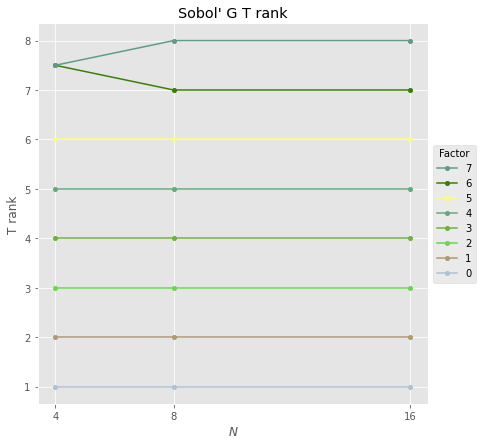

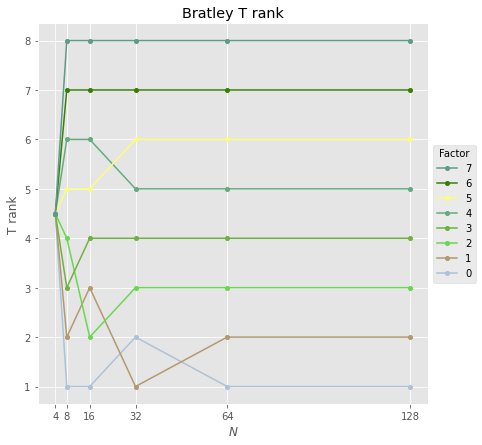

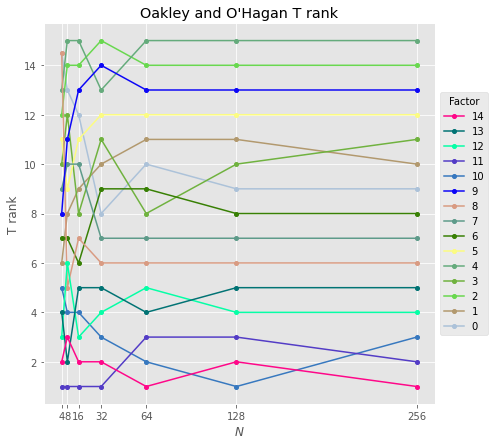

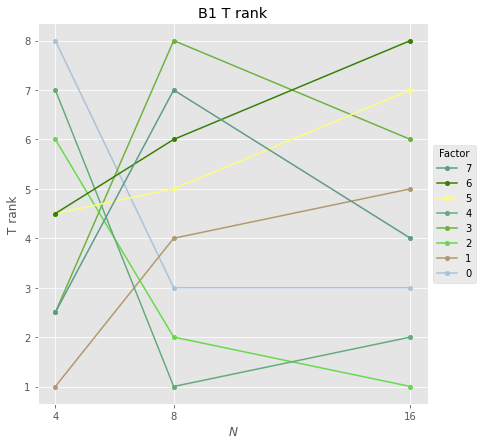

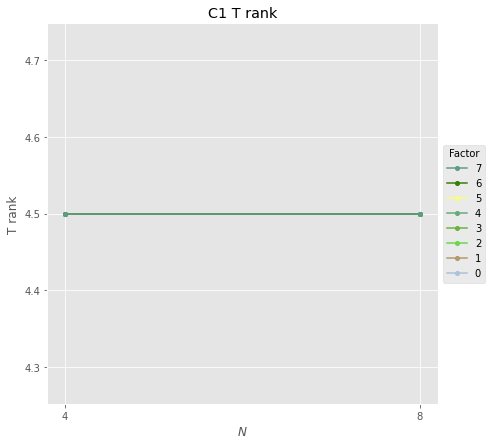

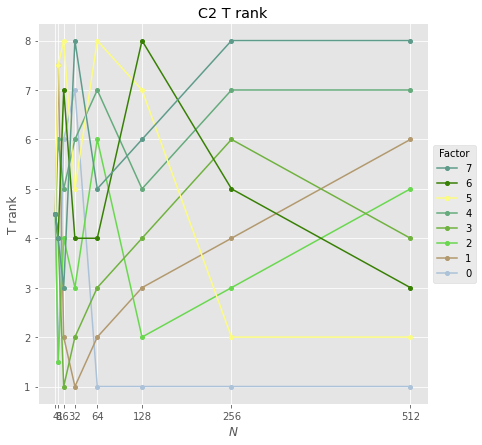

In [68]:
f_names = ["Sobol' G","Bratley","Oakley and O'Hagan",'B1','C1','C2']
for ifi,f in enumerate(functions):
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(1, 1, 1)
    for c in rank_T_df[f.__name__].iloc[:,:-1]:
        plt.plot(rank_T_df[f.__name__].index,rank_T_df[f.__name__][c],
                     color=colors_list[2*c],marker='o', markersize = 4,label=c)
        plt.xticks([2**(q+2) for q in range(len(rank_T_df[f.__name__]))])
        plt.xlabel('$N$')
        plt.ylabel('T rank')
        plt.title(f_names[ifi]+' T rank')
        handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], title='Factor', loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

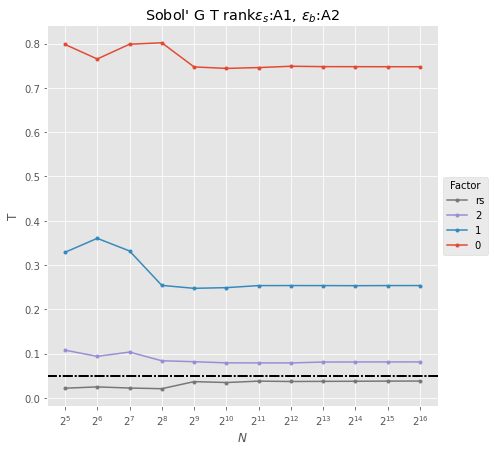

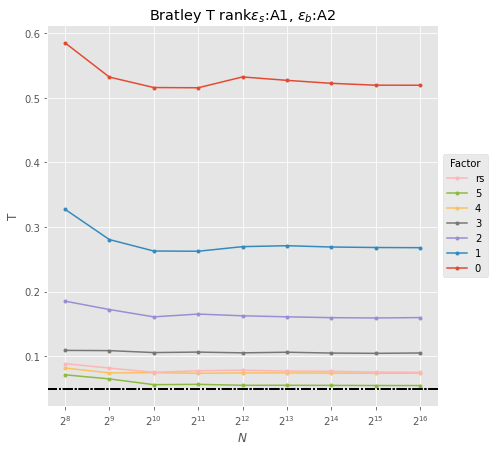

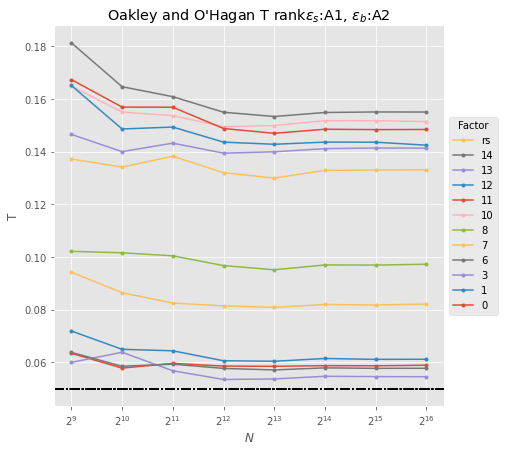

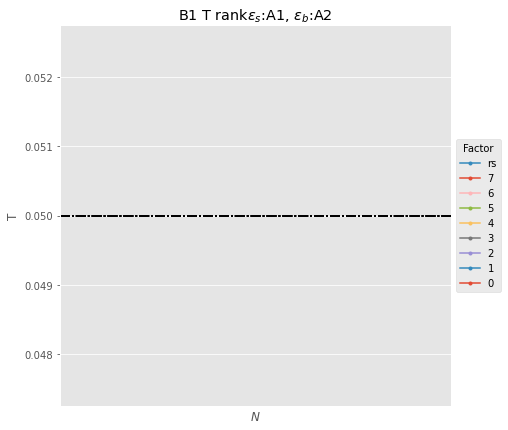

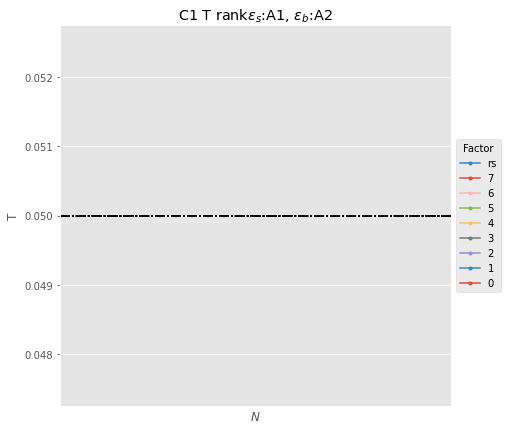

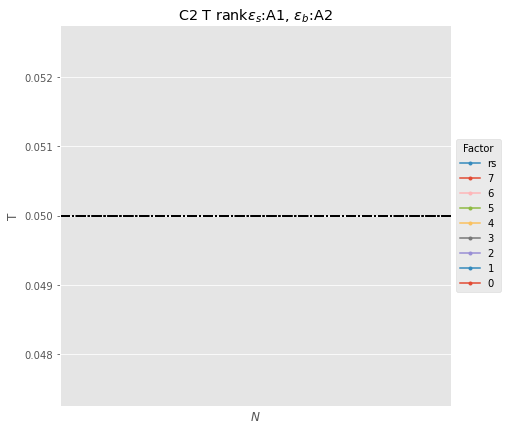

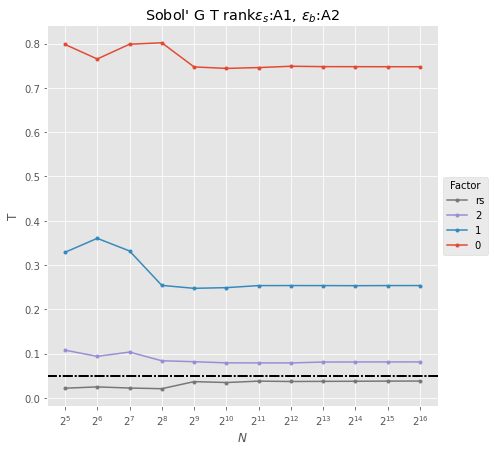

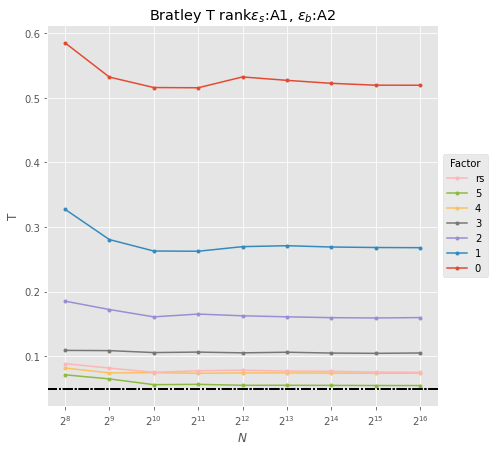

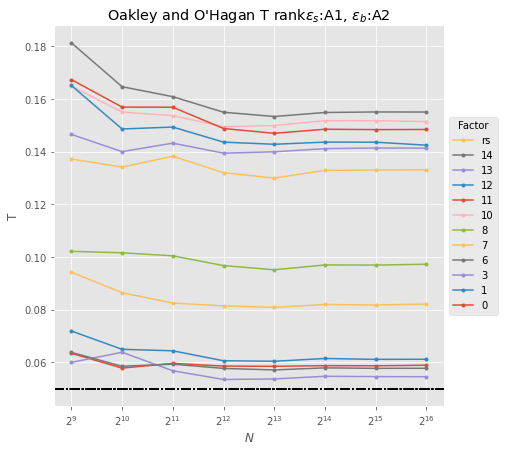

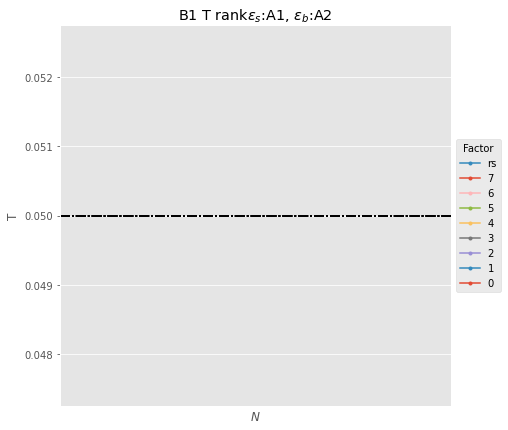

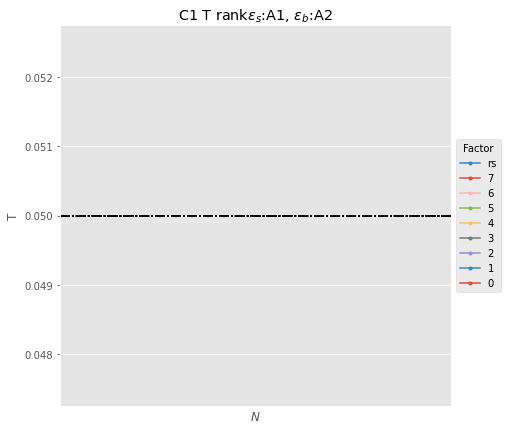

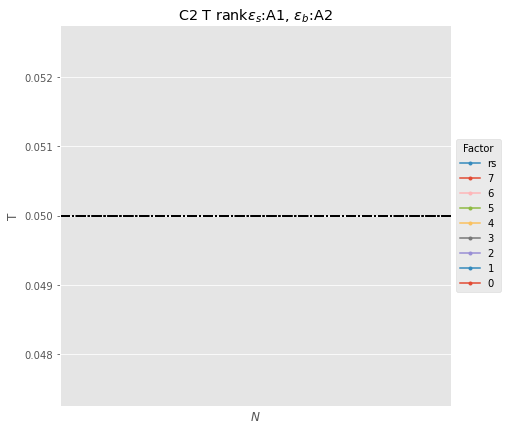

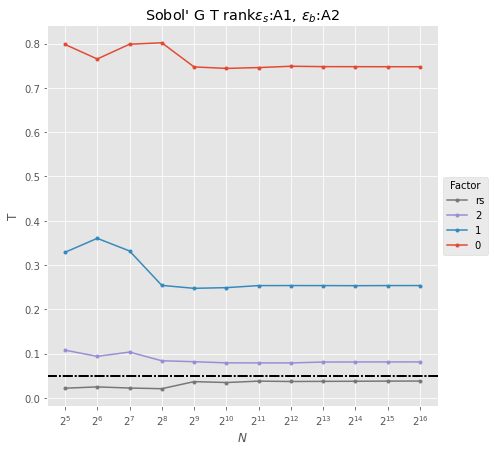

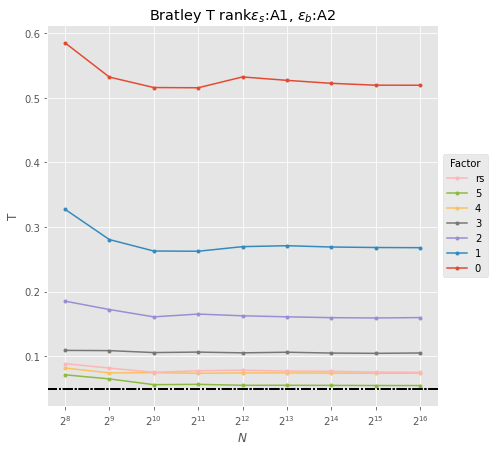

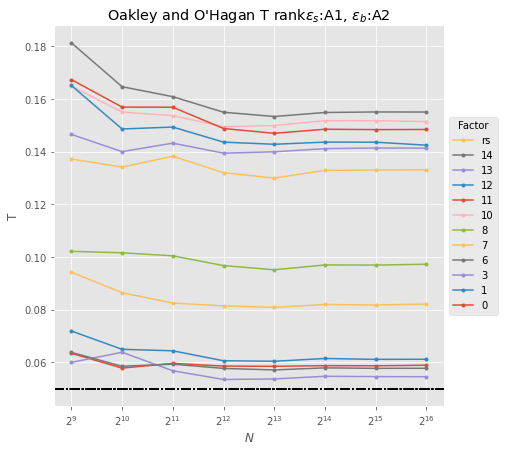

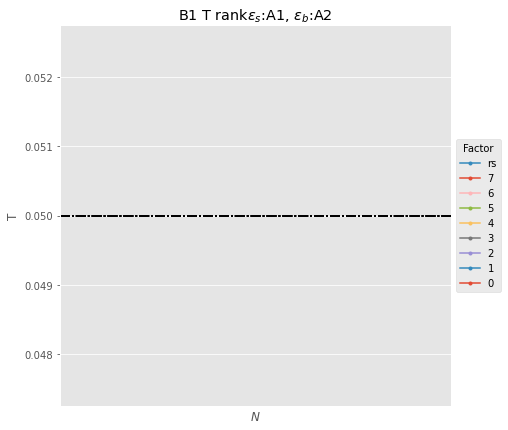

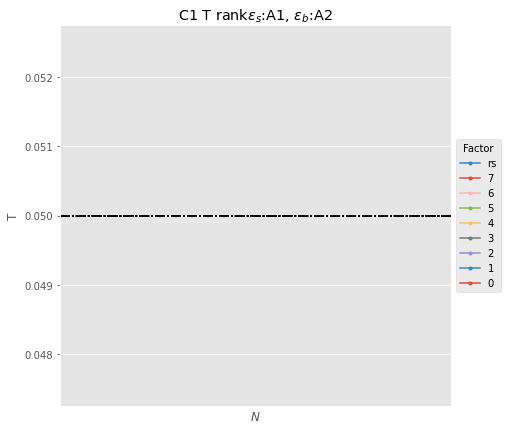

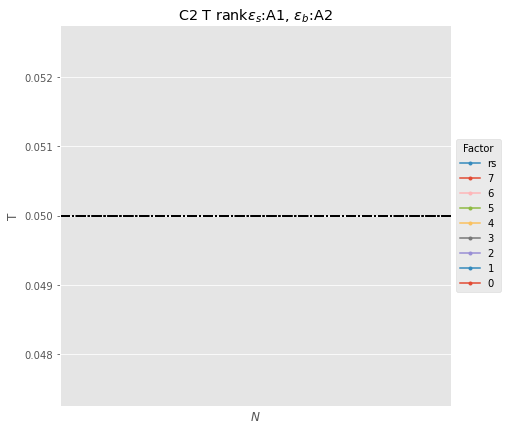

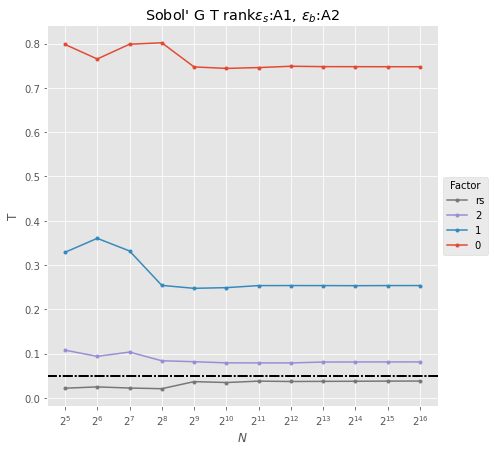

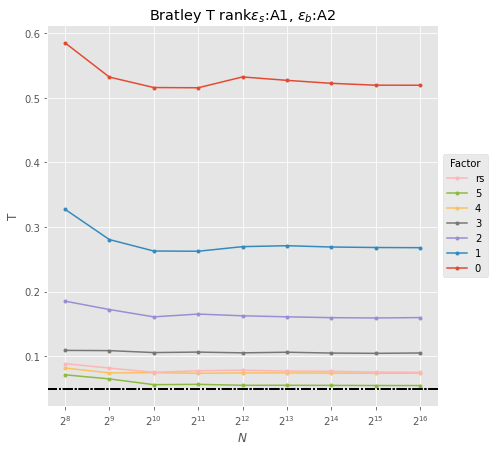

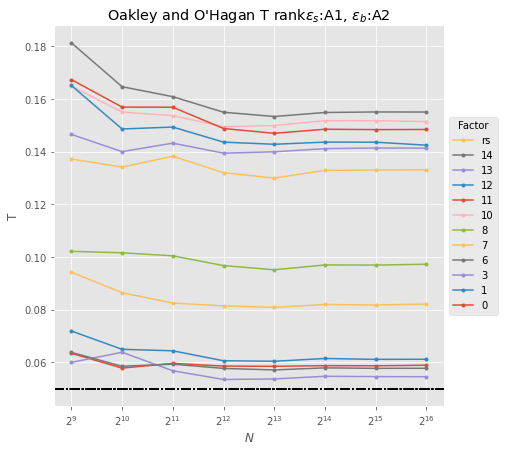

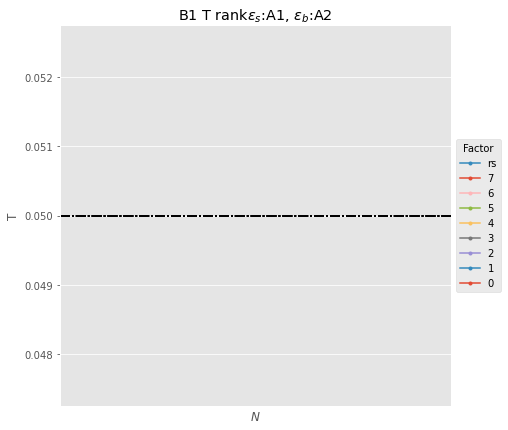

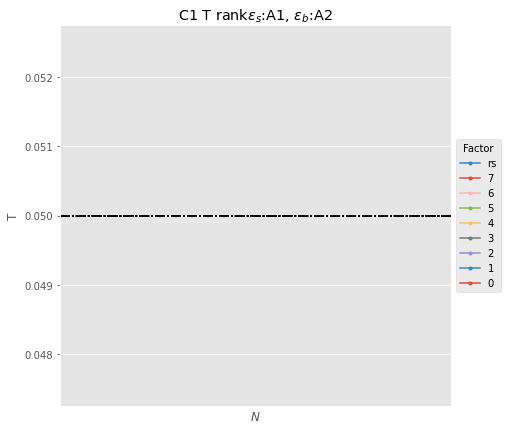

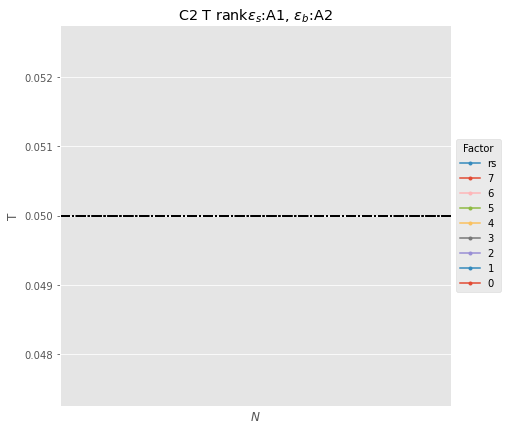

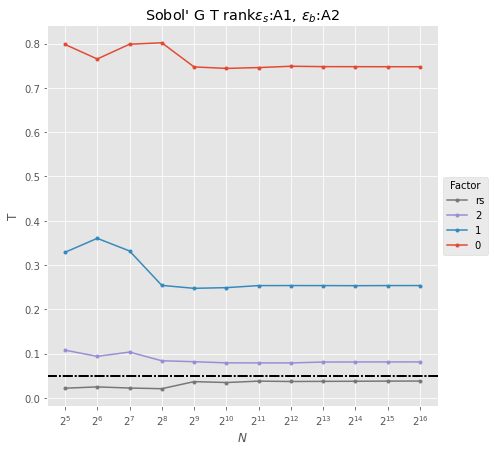

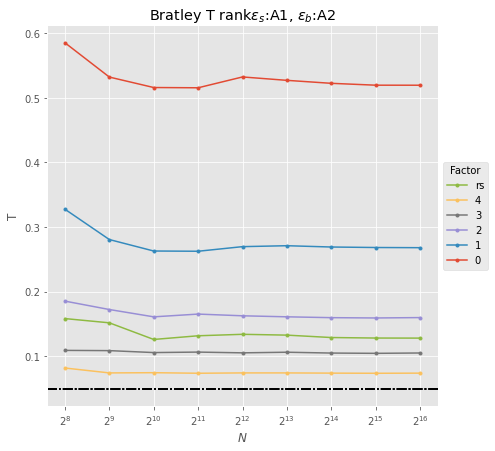

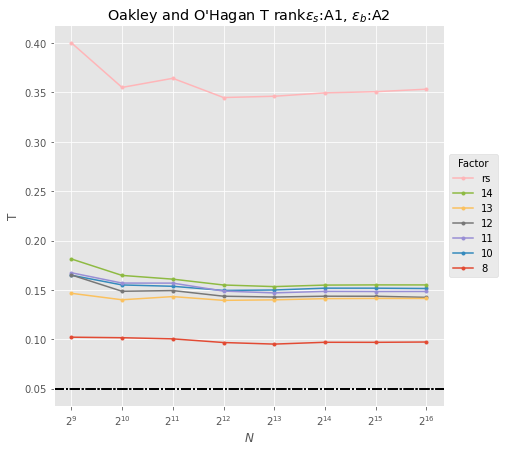

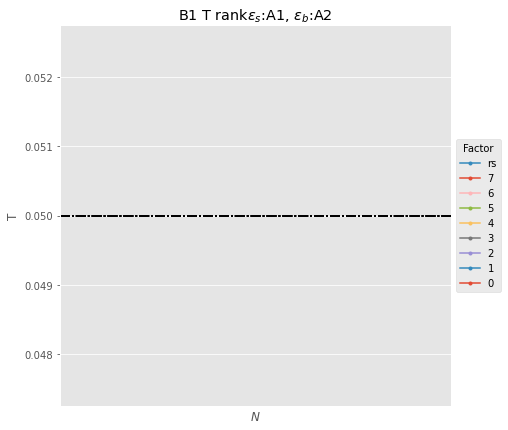

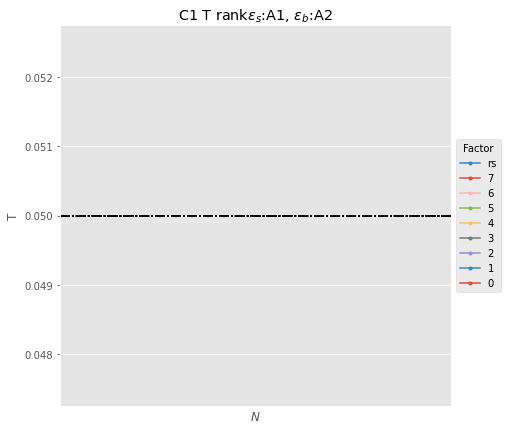

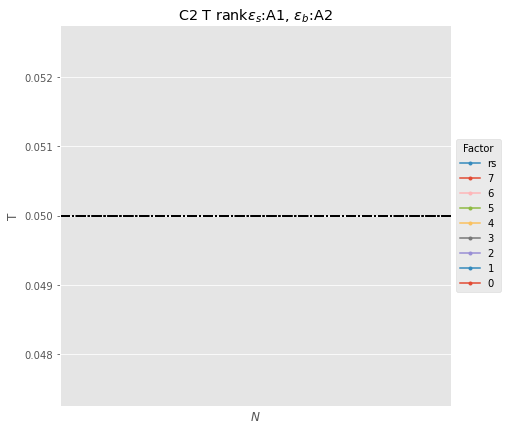

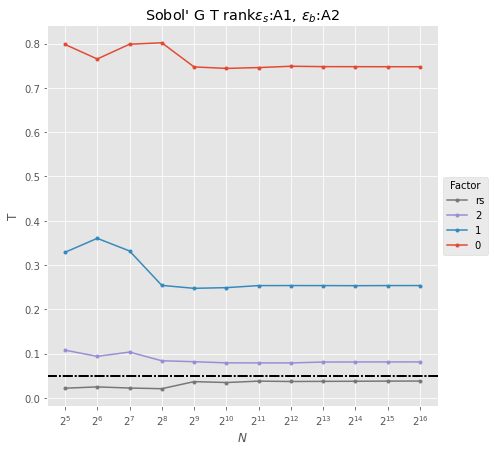

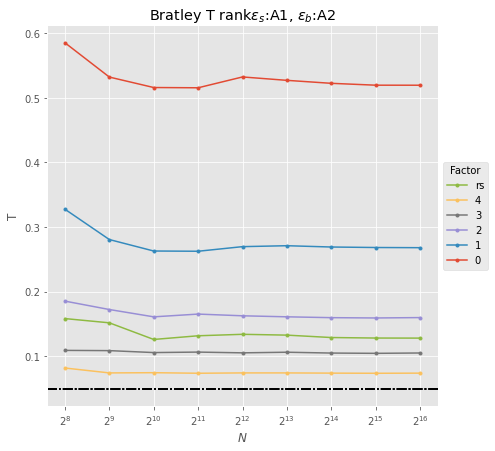

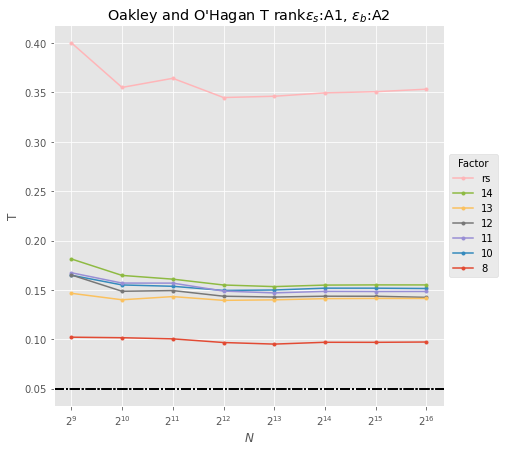

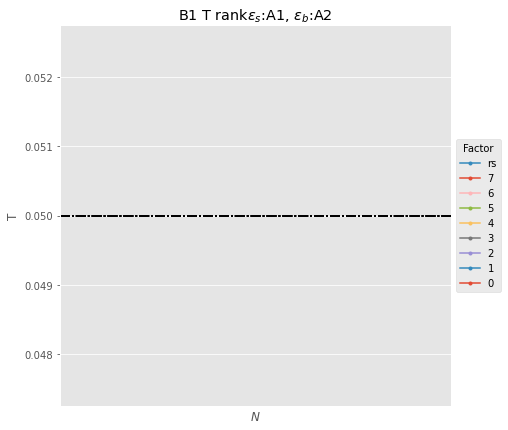

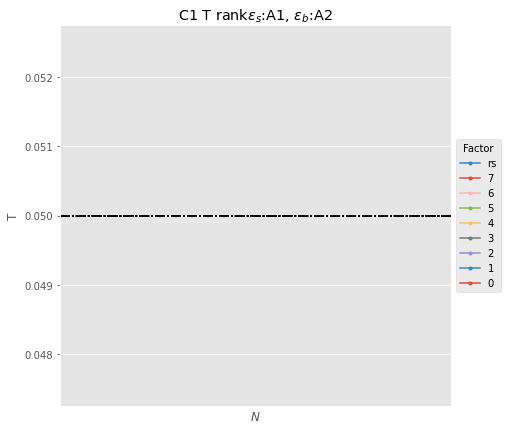

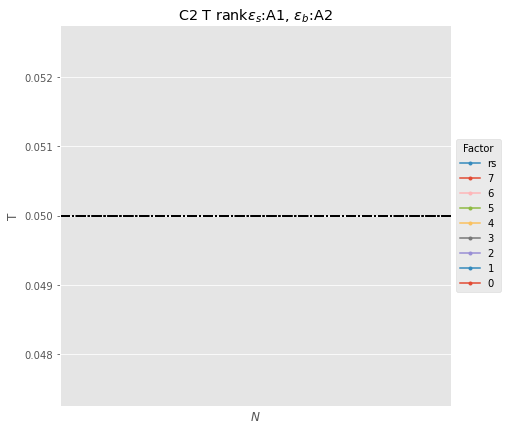

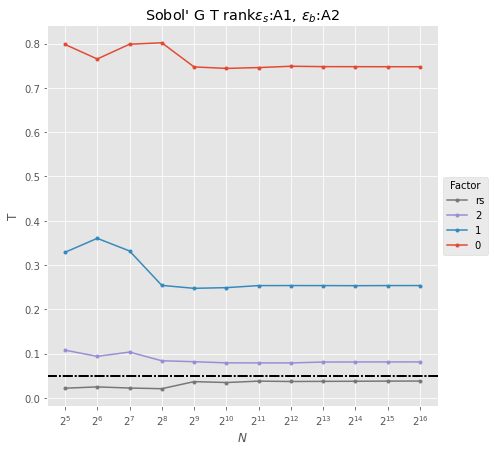

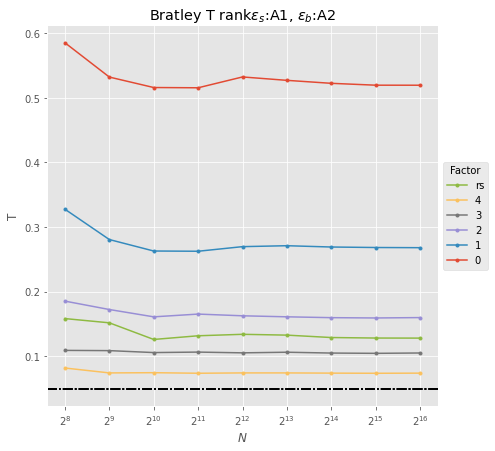

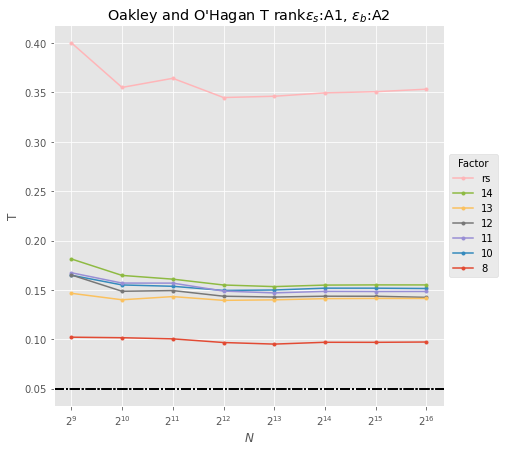

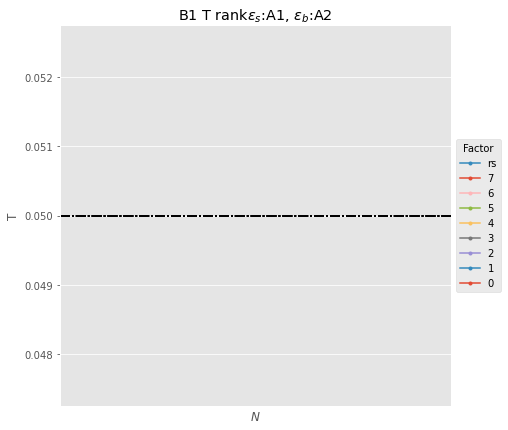

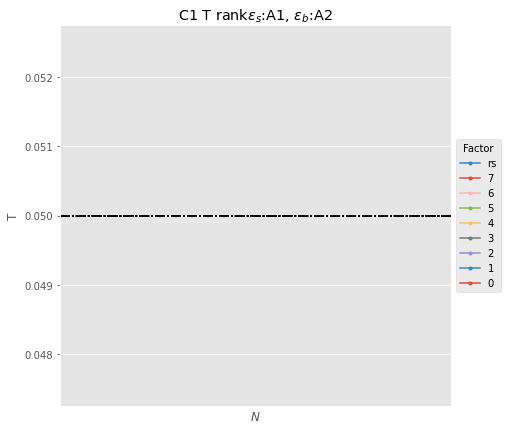

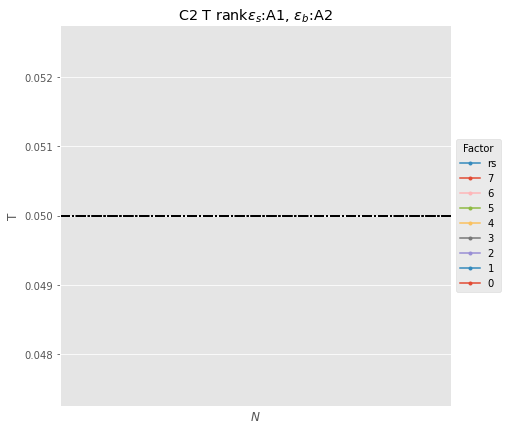

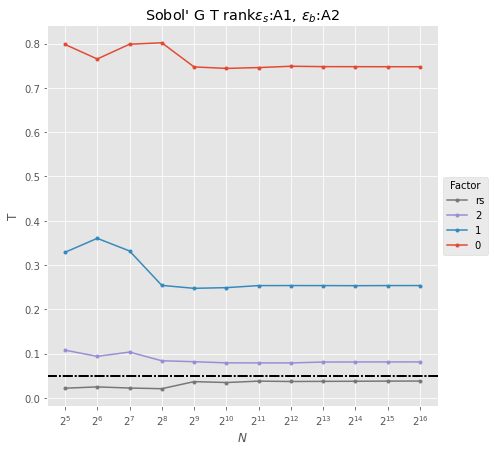

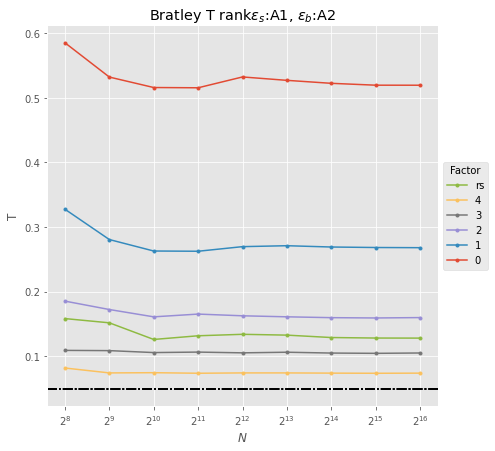

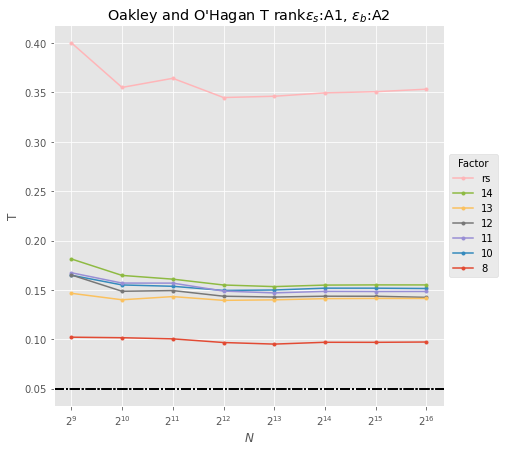

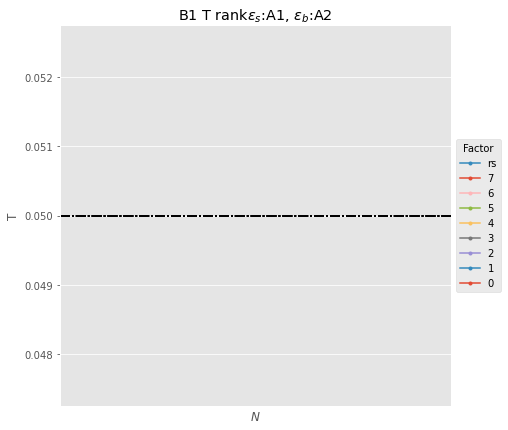

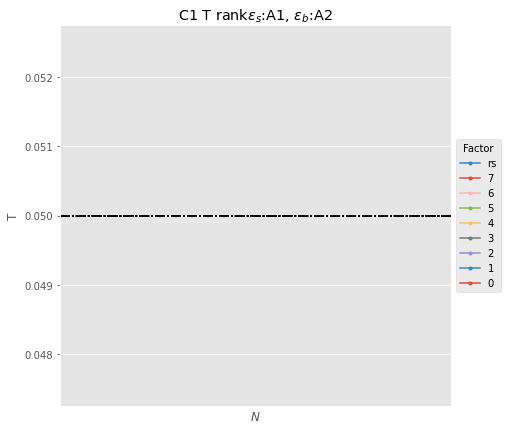

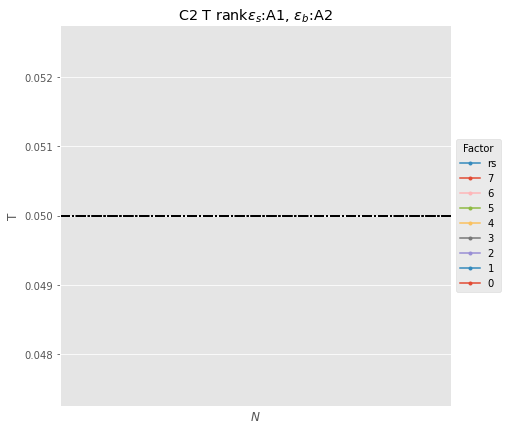

In [69]:
f_names = ["Sobol' G","Bratley","Oakley and O'Hagan",'B1','C1','C2']
for el in e_list:
    for ifi,f in enumerate(functions):
        fig = plt.figure(figsize=(7,7))
        ax = fig.add_subplot(1, 1, 1)
        for c in el[f.__name__].dropna(axis=1):
            plt.semilogx(el[f.__name__][el[f.__name__].count(axis=1)<len(el[f.__name__].T)].index,
                     el[f.__name__][el[f.__name__].count(axis=1)<len(el[f.__name__].T)][c],
                         marker = 'o', markersize = 3, basex=2,label=c)
            plt.axhline(y=0.05,ls='-.',c='k')
            plt.xticks([2**q for q in range(17-len(el[f.__name__][el[f.__name__].count(axis=1)<len(el[f.__name__].T)]),
                                            17)])
            plt.xlabel('$N$')
            plt.ylabel('T')
            plt.title(f_names[ifi]+' T rank'+' $\epsilon_s$:{}, $\epsilon_b$:{}'.format(*el))
        handles, labels = ax.get_legend_handles_labels()
        lgd = ax.legend(handles[::-1], labels[::-1], title='Factor', loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show()

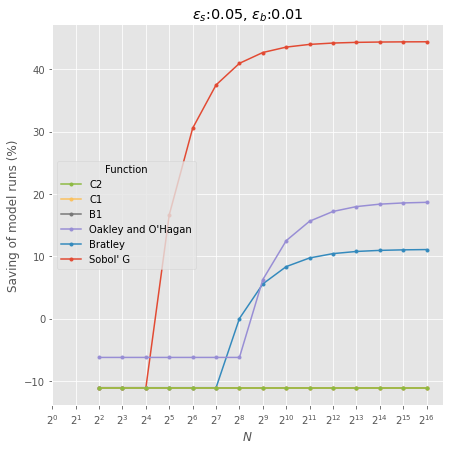

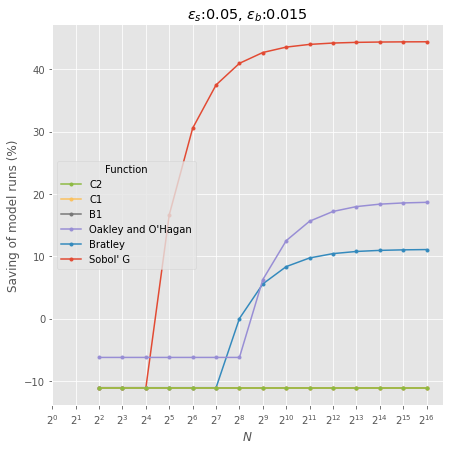

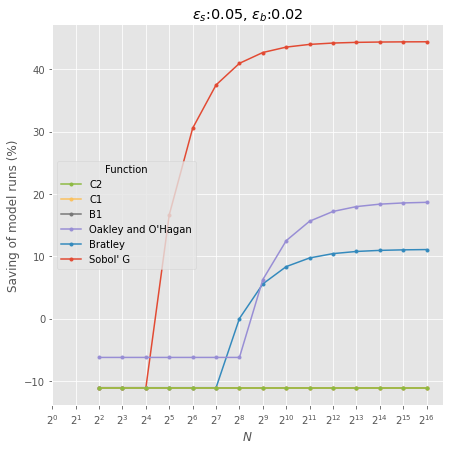

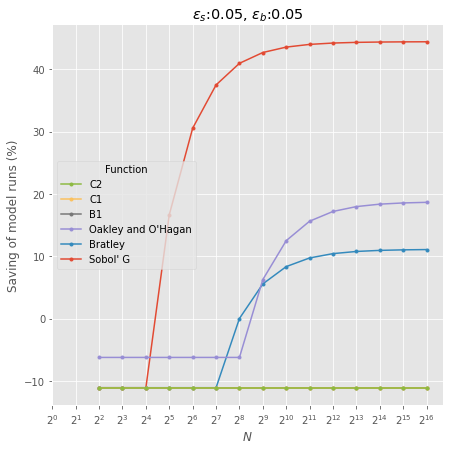

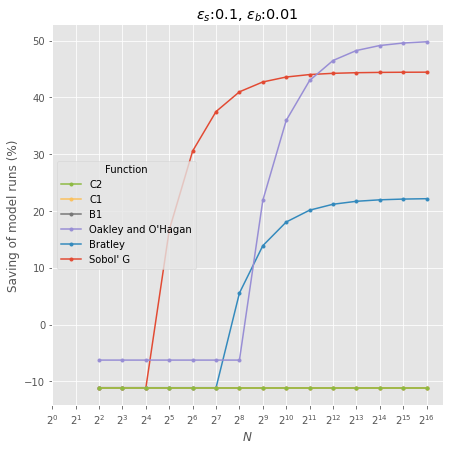

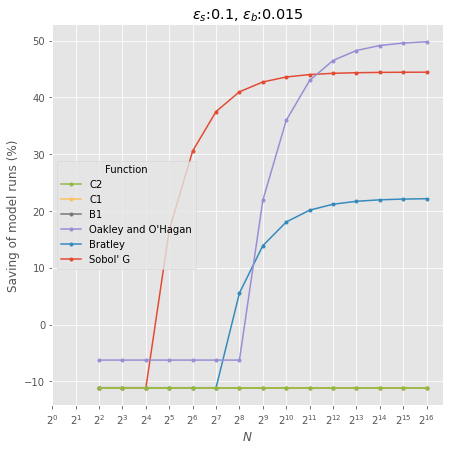

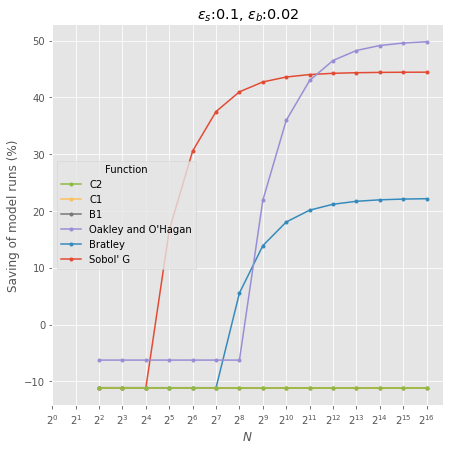

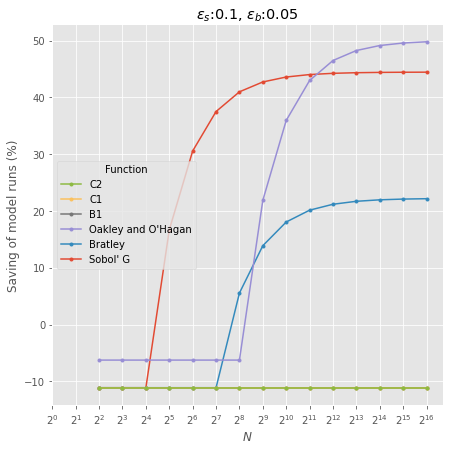

In [70]:
for ie,es in enumerate(e_saving):    
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(1, 1, 1)
    for ifi,f in enumerate(functions):
        plt.semilogx(es[f.__name__].index,es[f.__name__],marker = 'o', markersize = 3,basex=2,
                     label=f_names[ifi])
    plt.xticks([2**q for q in range(17)])
    plt.xlabel('$N$')
    plt.ylabel('Saving of model runs (%)')
    plt.title('$\epsilon_s$:{}, $\epsilon_b$:{}'.format(*epsilon_list[ie]))
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], title='Function', loc='center left')
    plt.show()